# Explore Session Data

## Variable Description 
- user_id: to be joined with the column 'id' in users table
- action_type: depth 1 action description
- action_detail: depth 2 action description
- action: depth 3 action description
- device_type
- secs_elapsed

## Summary of the exploratory analysis

- 11 action types, 156 action details, and 360 actions. 
- There is a general trend that the booking rate increases as the number of actions increase.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_s = pd.read_csv('sessions.csv')

In [3]:
df_s.shape

(10567737, 6)

In [4]:
df_s.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [5]:
df_s.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

- 10% of action_type and action_details are missing. 
- others are ~1% missing. 

# 1. Hierarchical action values

In [6]:
len(df_s.action_type.unique())

11

In [7]:
df_s.action_type.value_counts()[:10]

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [8]:
len(df_s.action_detail.unique())

156

In [9]:
df_s.action_detail.value_counts()[:10]

view_search_results            1776885
p3                             1376550
-unknown-                      1031141
wishlist_content_update         706824
user_profile                    656839
change_trip_characteristics     487744
similar_listings                364624
user_social_connections         336799
update_listing                  269779
listing_reviews                 269021
Name: action_detail, dtype: int64

In [10]:
len(df_s.action.unique())

360

In [11]:
df_s.action.value_counts()[:10]

show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
Name: action, dtype: int64

# 2. Examples of action counts

In [12]:
ids_book = ['kdtf2ybl8p', '5vxhow36hw']
ids_nobook = ['iojqb0tl08', 'wi81v6385f']

## users with bookings.

In [13]:
df_s[df_s.user_id == ids_book[0]].action.value_counts()

header_userpic    1
create            1
Name: action, dtype: int64

In [14]:
df_s[df_s.user_id == ids_book[1]].action.value_counts()

show                     18
update                    6
requested                 5
similar_listings          4
ajax_refresh_subtotal     4
reviews                   3
personalize               3
social_connections        3
new                       2
create                    2
active                    2
index                     2
manage_listing            2
verify                    1
authenticate              1
header_userpic            1
12                        1
signup_login              1
pending                   1
notifications             1
confirm_email             1
set_user                  1
campaigns                 1
listings                  1
Name: action, dtype: int64

## users without bookings.

In [15]:
df_s[df_s.user_id == ids_nobook[0]].action.value_counts()

update            14
index              3
create             2
confirm_email      2
header_userpic     2
manage_listing     2
set_user           1
Name: action, dtype: int64

In [16]:
df_s[df_s.user_id == ids_nobook[1]].action.value_counts()

show                                    6
header_userpic                          1
ajax_referral_banner_experiment_type    1
personalize                             1
create                                  1
ajax_get_referrals_amt                  1
similar_listings                        1
show_personalize                        1
Name: action, dtype: int64

# 3. The total number of actions

In [16]:
df_merged = pd.read_csv('train_user_session_merged.csv')
actions = pd.read_csv('actions.csv', header=None, names=['action']).action.tolist()

In [17]:
df = df_merged[['id', 'n_action', 'country_destination']].copy()

In [18]:
df.head()

,id,n_action,country_destination
0,yo8nz8bqcq,9,NDF
1,4grx6yxeby,16,NDF
2,ncf87guaf0,152,NDF
3,c8mfesvkv0,3,NDF
4,xwxei6hdk4,7,US


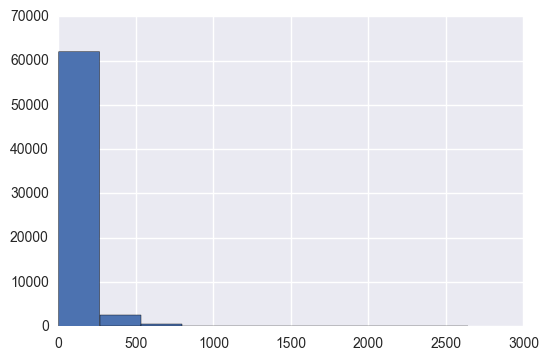

In [19]:
df.n_action.hist()

- We see that most users (~90%) have < 200 n_action, while maximum is 2644. 
- The number of actions is highly unbalanced. 

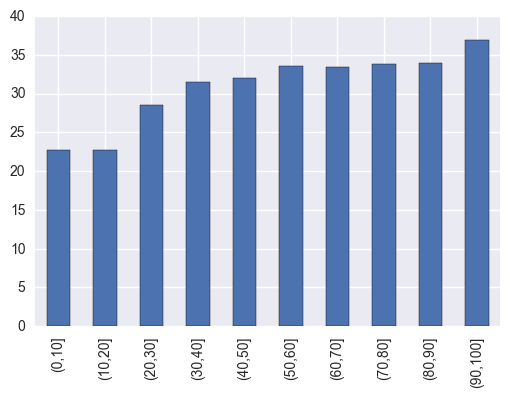

In [20]:
labels = ['(%d,%d]' %(10*i, 10*i+10) for i in range(10)]
df['n_action_quantile'] = pd.qcut(df['n_action'], q=10, labels=labels)

gp = df.groupby('n_action_quantile')
rates = []
for label, df_gp in gp:
    cnt = df_gp.country_destination.value_counts()
    booking_rate = (cnt/cnt.sum())['US']*100
    rates.append(booking_rate)
    
quantile_rate = pd.Series(rates, index=labels)
quantile_rate.plot(kind='bar')

- We see the general trend of the increase in booking rate as the number of actions increase.